<a href="https://colab.research.google.com/github/Mordy40/CS50/blob/main/Mock_medical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Essential for data analysis
import pandas as pd
import numpy as np

# For working with SQL (if using SQLite in Colab)
import sqlite3

# Optional: For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: To display wide tables better
from IPython.display import display


In [2]:
# Fix known compatibility issue between ipython-sql and newer prettytable
!pip install prettytable==3.5.0 --force-reinstall
!pip install ipython-sql


  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.13
    Uninstalling wcwidth-0.2.13:
      Successfully uninstalled wcwidth-0.2.13
  Attempting uninstall: prettytable
    Found existing installation: prettytable 3.16.0
    Uninstalling prettytable-3.16.0:
      Successfully uninstalled prettytable-3.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.3 MB/s eta 0:00:00


In [3]:
#CREATE the SQL DB used in line 47
%load_ext sql
%sql sqlite:///patient_data.db


In [4]:
from google.colab import files
uploaded = files.upload()

Saving mock_patient_data_v2.csv to mock_patient_data_v2.csv


In [5]:
patient_data = pd.read_csv("mock_patient_data_v2.csv")

In [6]:
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,Insulin,Yes,No
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,No,Yes
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,Yes,No
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,Metformin,No,No
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,Metformin,Yes,No


In [7]:
patient_data.describe()

,age,a1c_level,bmi
count,250.00000,250.000000,250.000000
mean,55.20000,7.172400,28.727200
std,20.10055,1.325044,5.991887
min,20.00000,3.200000,11.900000
25%,37.25000,6.300000,24.825000
50%,55.50000,7.200000,28.800000
75%,72.75000,8.100000,32.775000
max,89.00000,11.300000,44.600000


In [8]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       250 non-null    object 
 1   age              250 non-null    int64  
 2   gender           250 non-null    object 
 3   diagnosis_code   250 non-null    object 
 4   a1c_level        250 non-null    float64
 5   bmi              250 non-null    float64
 6   visit_date       250 non-null    object 
 7   medication       207 non-null    object 
 8   admitted         250 non-null    object 
 9   readmission_30d  250 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 19.7+ KB


In [9]:
patient_data["a1c_level_norm"] = patient_data['a1c_level']/patient_data['a1c_level'].max()
patient_data["a1c_level_norm"]

,a1c_level_norm
0,0.920354
1,0.725664
2,0.707965
3,0.663717
4,0.938053
...,...
245,0.690265
246,0.495575
247,0.725664
248,0.761062


In [10]:
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,Insulin,Yes,No,0.920354
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,No,Yes,0.725664
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,Yes,No,0.707965
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,Metformin,No,No,0.663717
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,Metformin,Yes,No,0.938053


In [11]:
patient_data.isnull().sum()

,0
patient_id,0
age,0
gender,0
diagnosis_code,0
a1c_level,0
bmi,0
visit_date,0
medication,43
admitted,0
readmission_30d,0


In [12]:
patient_data.dtypes

,0
patient_id,object
age,int64
gender,object
diagnosis_code,object
a1c_level,float64
bmi,float64
visit_date,object
medication,object
admitted,object
readmission_30d,object


In [13]:
dummy_variable = pd.get_dummies(patient_data['gender'])
patient_data = pd.concat([patient_data, dummy_variable],axis = 1)

In [14]:
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,F,M
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,Insulin,Yes,No,0.920354,True,False
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,No,Yes,0.725664,True,False
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,Yes,No,0.707965,True,False
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,Metformin,No,No,0.663717,False,True
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,Metformin,Yes,No,0.938053,False,True


In [15]:
# prompt: transform "M" and "F" columns from boolean to int

patient_data["M"] = patient_data["M"].astype(int)
patient_data['F'] = patient_data['F'].astype(int)
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,F,M
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,Insulin,Yes,No,0.920354,1,0
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,No,Yes,0.725664,1,0
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,Yes,No,0.707965,1,0
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,Metformin,No,No,0.663717,0,1
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,Metformin,Yes,No,0.938053,0,1


In [16]:
patient_data['admitted_int'] = patient_data['admitted'].str.strip().str.lower().map({'yes': 1, 'no': 0})
patient_data['readmission_30d_int']= patient_data['readmission_30d'].str.strip().str.lower().map({'yes': 1, 'no': 0})
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,F,M,admitted_int,readmission_30d_int
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,Insulin,Yes,No,0.920354,1,0,1,0
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,No,Yes,0.725664,1,0,0,1
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,Yes,No,0.707965,1,0,1,0
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,Metformin,No,No,0.663717,0,1,0,0
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,Metformin,Yes,No,0.938053,0,1,1,0


In [20]:
print(patient_data['diagnosis_code'].unique())

['E11.9' 'E03.9' 'E78.5' 'I10' 'J45.9' 'E66.9']


In [28]:
#patient_data.dtypes
patient_data["visit_date"] = pd.to_datetime(patient_data["visit_date"])  # If not already


In [21]:
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,F,M,admitted_int,readmission_30d_int
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,Insulin,Yes,No,0.920354,1,0,1,0
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,No,Yes,0.725664,1,0,0,1
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,Yes,No,0.707965,1,0,1,0
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,Metformin,No,No,0.663717,0,1,0,0
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,Metformin,Yes,No,0.938053,0,1,1,0


In [29]:
#To Lowercase
patient_data['admitted'] = patient_data['admitted'].str.strip().str.lower()
patient_data['readmission_30d'] = patient_data['readmission_30d'].str.strip().str.lower()
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,f,m,admitted_int,readmission_30d_int
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,Insulin,yes,no,0.920354,1,0,1,0
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,no,yes,0.725664,1,0,0,1
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,yes,no,0.707965,1,0,1,0
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,Metformin,no,no,0.663717,0,1,0,0
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,Metformin,yes,no,0.938053,0,1,1,0


In [37]:
#To lowercase with MISSING VALUES: SAME - function avoids the NaN
patient_data['medication'] = patient_data['medication'].str.strip().str.lower()


#Even in case-insensitive SQL version may be best practice to clean data to lowercase -> especially if possible import to case-sensitivie version.

In [38]:
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,f,m,admitted_int,readmission_30d_int,medication_title
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,insulin,yes,no,0.920354,1,0,1,0,Insulin
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,no,yes,0.725664,1,0,0,1,NaN
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,yes,no,0.707965,1,0,1,0,NaN
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,metformin,no,no,0.663717,0,1,0,0,Metformin
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,metformin,yes,no,0.938053,0,1,1,0,Metformin


In [40]:
#To UPPERCASE (or TITLE format in this case) & Set as a new column.
patient_data["medication_title"] = patient_data["medication"].str.strip().str.title()
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,f,m,admitted_int,readmission_30d_int,medication_title
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,insulin,yes,no,0.920354,1,0,1,0,Insulin
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,no,yes,0.725664,1,0,0,1,NaN
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,yes,no,0.707965,1,0,1,0,NaN
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,metformin,no,no,0.663717,0,1,0,0,Metformin
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,metformin,yes,no,0.938053,0,1,1,0,Metformin


In [90]:
# Age groups for stratified queries
patient_data['age_group'] = pd.cut(patient_data['age'], bins=[0, 30, 45, 60, 75, 100],
                     labels=["<30", "30–45", "45–60", "60–75", "75+"])
patient_data.head()

,patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,f,m,admitted_int,readmission_30d_int,medication_title,age_group
0,P00001,67,F,E11.9,10.4,34.5,2023-02-26,insulin,yes,no,0.920354,1,0,1,0,Insulin,60–75
1,P00002,88,F,E11.9,8.2,27.9,2024-01-17,NaN,no,yes,0.725664,1,0,0,1,NaN,75+
2,P00003,45,F,E03.9,8.0,19.5,2024-01-20,NaN,yes,no,0.707965,1,0,1,0,NaN,30–45
3,P00004,87,M,E11.9,7.5,33.6,2024-02-14,metformin,no,no,0.663717,0,1,0,0,Metformin,75+
4,P00005,43,M,E78.5,10.6,36.1,2023-03-08,metformin,yes,no,0.938053,0,1,1,0,Metformin,30–45


In [91]:
#Save df as CSV

patient_data.to_csv("patient_data_cleaned.csv", index=False)

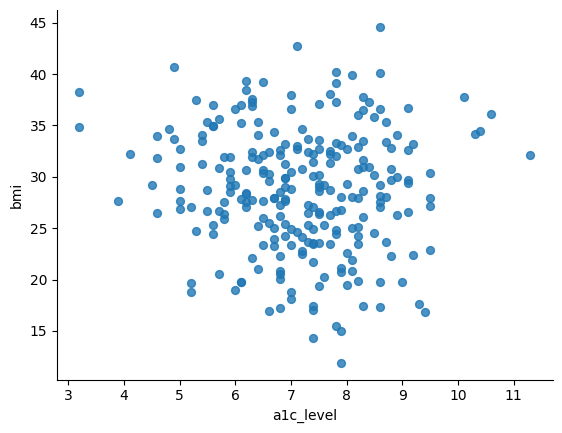

In [92]:
# @title a1c_level vs bmi

from matplotlib import pyplot as plt
patient_data.plot(kind='scatter', x='a1c_level', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# New Section

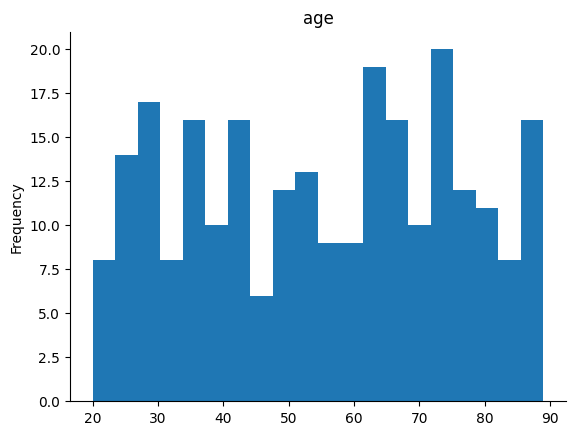

In [93]:
# @title age
patient_data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

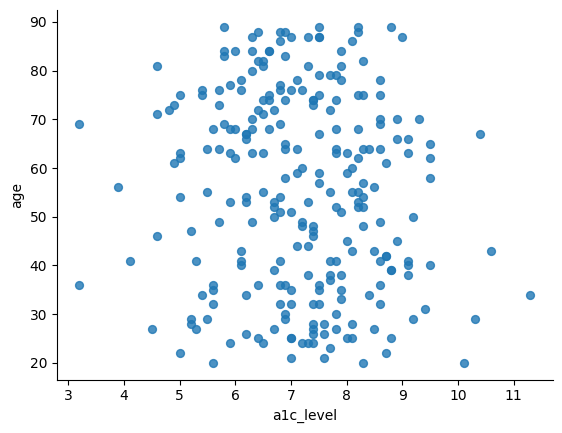

In [94]:
patient_data.plot(kind='scatter', x='a1c_level', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

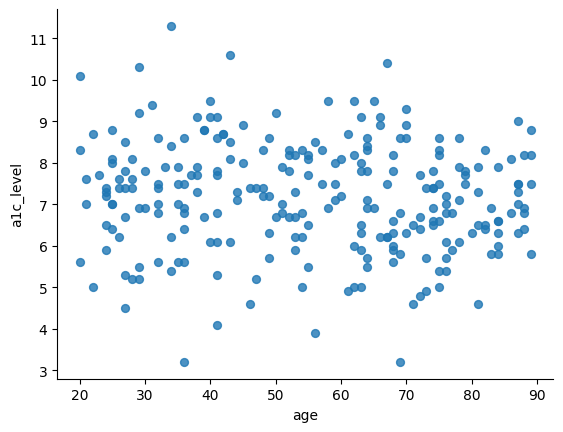

In [95]:
patient_data.plot(kind='scatter', x='age', y='a1c_level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [96]:
#Let's start now programming with SQL


In [97]:
#Create SQLite Database in Memory or File (.db was created on line 3)

conn = sqlite3.connect("patient_data.db")  # Or use ":memory:" for in-RAM only

In [98]:
#Write Pandas DataFrame to SQL Table
patient_data.to_sql("patients", conn, if_exists="replace", index=False)

250

In [99]:
%%sql
SELECT *
FROM patients
LIMIT 5;

 * sqlite:///patient_data.db
Done.


patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,f,m,admitted_int,readmission_30d_int,medication_title,age_group
P00001,67,F,E11.9,10.4,34.5,2023-02-26 00:00:00,insulin,yes,no,0.9203539823008849,1,0,1,0,Insulin,60–75
P00002,88,F,E11.9,8.2,27.9,2024-01-17 00:00:00,None,no,yes,0.7256637168141592,1,0,0,1,None,75+
P00003,45,F,E03.9,8.0,19.5,2024-01-20 00:00:00,None,yes,no,0.7079646017699115,1,0,1,0,None,30–45
P00004,87,M,E11.9,7.5,33.6,2024-02-14 00:00:00,metformin,no,no,0.663716814159292,0,1,0,0,Metformin,75+
P00005,43,M,E78.5,10.6,36.1,2023-03-08 00:00:00,metformin,yes,no,0.9380530973451326,0,1,1,0,Metformin,30–45


In [100]:
%%sql
SELECT *
FROM patients
LIMIT 5;

 * sqlite:///patient_data.db
Done.


patient_id,age,gender,diagnosis_code,a1c_level,bmi,visit_date,medication,admitted,readmission_30d,a1c_level_norm,f,m,admitted_int,readmission_30d_int,medication_title,age_group
P00001,67,F,E11.9,10.4,34.5,2023-02-26 00:00:00,insulin,yes,no,0.9203539823008849,1,0,1,0,Insulin,60–75
P00002,88,F,E11.9,8.2,27.9,2024-01-17 00:00:00,None,no,yes,0.7256637168141592,1,0,0,1,None,75+
P00003,45,F,E03.9,8.0,19.5,2024-01-20 00:00:00,None,yes,no,0.7079646017699115,1,0,1,0,None,30–45
P00004,87,M,E11.9,7.5,33.6,2024-02-14 00:00:00,metformin,no,no,0.663716814159292,0,1,0,0,Metformin,75+
P00005,43,M,E78.5,10.6,36.1,2023-03-08 00:00:00,metformin,yes,no,0.9380530973451326,0,1,1,0,Metformin,30–45


In [101]:
%%sql
SELECT diagnosis_code, COUNT(*) AS count
FROM patients
GROUP BY diagnosis_code
ORDER BY count DESC;


 * sqlite:///patient_data.db
Done.


diagnosis_code,count
I10,44
E11.9,43
J45.9,42
E03.9,42
E66.9,40
E78.5,39


In [102]:
%%sql
SELECT round(avg(bmi),2) AS avg_bmi
FROM patients;

 * sqlite:///patient_data.db
Done.


avg_bmi
28.73


In [103]:
%%sql
SELECT COUNT(*) AS count
FROM patients;

 * sqlite:///patient_data.db
Done.


count
250


In [104]:
#To see the table schema

%%sql
PRAGMA table_info(patients);


 * sqlite:///patient_data.db
Done.


cid,name,type,notnull,dflt_value,pk
0,patient_id,TEXT,0,None,0
1,age,INTEGER,0,None,0
2,gender,TEXT,0,None,0
3,diagnosis_code,TEXT,0,None,0
4,a1c_level,REAL,0,None,0
5,bmi,REAL,0,None,0
6,visit_date,TIMESTAMP,0,None,0
7,medication,TEXT,0,None,0
8,admitted,TEXT,0,None,0
9,readmission_30d,TEXT,0,None,0


In [105]:
%%sql
SELECT DISTINCT diagnosis_code FROM patients;


 * sqlite:///patient_data.db
Done.


diagnosis_code
E11.9
E03.9
E78.5
I10
J45.9
E66.9


In [106]:
# Find the number of distinct diagnosis codes:
%%sql
SELECT diagnosis_code, count(*) FROM patients
Group by diagnosis_code
ORDER BY count(*) DESC;

 * sqlite:///patient_data.db
Done.


diagnosis_code,count(*)
I10,44
E11.9,43
J45.9,42
E03.9,42
E66.9,40
E78.5,39


In [107]:
#5. List all medications and how often they were prescribed - REMOVE the NONE Field!!!
%%sql
SELECT DISTINCT medication, count(*) AS count FROM patients
WHERE medication != 'None'
Group by medication
ORDER BY count DESC;

 * sqlite:///patient_data.db
Done.


medication,count
insulin,51
lisinopril,46
metformin,45
glp-1,33
atorvastatin,32


In [108]:
#6. Calculate the average BMI for each gender:
%%sql
SELECT gender, round(AVG(bmi), 2) AS avg_bmi
FROM patients
GROUP BY gender;

 * sqlite:///patient_data.db
Done.


gender,avg_bmi
F,28.22
M,29.14


In [109]:
#6.5. Find the number of patients who were and were not admitted
%%sql
SELECT admitted, count(*) AS count
FROM patients
GROUP BY admitted
ORDER BY count;


 * sqlite:///patient_data.db
Done.


admitted,count
yes,88
no,162


In [110]:
#6.9. Find the max and min A1C values for each diagnosis code:
%%sql
SELECT diagnosis_code, max(a1c_level) as max_a1c, MIN(a1c_level) as min_a1c
FROM patients
GROUP BY diagnosis_code
ORDER BY max_a1c DESC;

 * sqlite:///patient_data.db
Done.


diagnosis_code,max_a1c,min_a1c
E03.9,11.3,4.8
E78.5,10.6,3.2
E11.9,10.4,4.6
I10,9.5,4.5
E66.9,9.1,5.6
J45.9,8.9,3.2


In [111]:
#7a. For each diagnosis code, calculate the NUMBER of patients readmitted within 30 days:
%%sql
SELECT diagnosis_code, count(*) as readmission_30d
FROM patients
WHERE readmission_30d = lower('Yes')
GROUP BY diagnosis_code
ORDER BY readmission_30d DESC;

 * sqlite:///patient_data.db
Done.


diagnosis_code,readmission_30d
I10,12
E66.9,12
E78.5,11
E11.9,11
E03.9,9
J45.9,7


In [112]:
#7b. For each diagnosis code, calculate the PERCENTAGE of patients readmitted within 30 days:
%%sql
SELECT diagnosis_code,
       ROUND(SUM(CASE WHEN readmission_30d = 'yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS readmit_rate
FROM patients
GROUP BY diagnosis_code
ORDER BY readmit_rate DESC;



 * sqlite:///patient_data.db
Done.


diagnosis_code,readmit_rate
E66.9,30.0
E78.5,28.21
I10,27.27
E11.9,25.58
E03.9,21.43
J45.9,16.67


In [113]:
#7c.For each diagnosis code, calculate the PERCENTAGE of patients readmitted within 30 days: use admitted_int & readmission_30d_int
%%sql
SELECT diagnosis_code, ROUND(sum(readmission_30d_int) * 100.0 / COUNT(*), 2) AS percentage_readmitted
FROM patients
GROUP BY diagnosis_code
ORDER BY percentage_readmitted DESC

 * sqlite:///patient_data.db
Done.


diagnosis_code,percentage_readmitted
E66.9,30.0
E78.5,28.21
I10,27.27
E11.9,25.58
E03.9,21.43
J45.9,16.67


In [114]:
#7.5. Get average A1C for each age group bucket:
%%sql
SELECT age_group, round(AVG(a1c_level), 2) as a1c_avg
FROM patients
GROUP BY age_group
ORDER BY a1c_avg DESC;

 * sqlite:///patient_data.db
Done.


age_group,a1c_avg
30–45,7.51
<30,7.21
45–60,7.18
60–75,7.03
75+,6.97


In [116]:
#8. Find patients with A1C above the dataset’s overall average:

%%sql
SELECT patient_id, a1c_level
FROM patients
WHERE a1c_level > (SELECT avg(a1c_level) FROM patients) LIMIT 10;

 * sqlite:///patient_data.db
Done.


patient_id,a1c_level
P00001,10.4
P00002,8.2
P00003,8.0
P00004,7.5
P00005,10.6
P00010,7.4
P00014,8.5
P00015,7.8
P00016,8.3
P00017,8.3


In [117]:
#8.3. List the top 3 most common diagnosis codes among admitted patients
%%sql
SELECT diagnosis_code, COUNT(*) AS count
FROM patients
WHERE admitted = 'yes'
GROUP BY diagnosis_code
ORDER BY count DESC
LIMIT 3;


 * sqlite:///patient_data.db
Done.


diagnosis_code,count
E03.9,20
I10,15
E11.9,15


In [121]:
#8.6. Show patients whose BMI is higher than the average BMI for their medication group and order bu highest a1c levels:
%%sql
SELECT p1.patient_id
FROM patients p1
JOIN (Select medication, AVG(BMI) as avg_bmi
      FROM patients
      GROUP BY medication) p2
ON p1.medication = p2.medication
WHERE p1.bmi> p2.avg_bmi
ORDER BY a1c_level DESC
LIMIT 10;

 * sqlite:///patient_data.db
Done.


patient_id
P00146
P00005
P00001
P00167
P00163
P00072
P00225
P00069
P00240
P00244


In [142]:
#8.9.a Get the # of patients on meds who were readmitted within 30 days:
%%sql
SELECT DISTINCT medication, count(*) as readmitted_count
FROM patients
WHERE readmission_30d_int = 1
AND  medication != 'None'
GROUP BY medication
ORDER BY readmitted_count DESC;



 * sqlite:///patient_data.db
Done.


medication,readmitted_count
insulin,14
lisinopril,13
metformin,9
glp-1,9
atorvastatin,7


In [155]:
#8.9.b Get the % of patients on GLP-1 meds who were readmitted within 30 days:
%%sql
SELECT ROUND(SUM(readmission_30d_int) * 100/count(*),2) AS percentage_GLP_readmitted
FROM patients
WHERE medication LIKE "%glp%"
;

 * sqlite:///patient_data.db
Done.


percentage_GLP_readmitted
27.0


In [162]:
#9.1. For each medication, calculate the average A1C only among patients who were readmitted:
%%sql
SELECT medication, ROUND(AVG(a1c_level), 2) as avg_a1c_readmitted
FROM patients
WHERE medication != 'none'
AND readmission_30d = 'yes'
GROUP BY medication
ORDER BY avg_a1c_readmitted DESC;

 * sqlite:///patient_data.db
Done.


medication,avg_a1c_readmitted
metformin,7.17
glp-1,7.17
lisinopril,7.03
atorvastatin,7.03
insulin,6.94


In [190]:
#9.2. Get the 5 most recent patient visits- Change date format to drop the time time and to be dd/mm/yyyy
%%sql
SELECT patient_id, strftime('%d-%m-%Y', visit_date) AS visit_day
FROM patients
ORDER BY visit_day DESC LIMIT 5;

 * sqlite:///patient_data.db
Done.


patient_id,visit_day
P00030,31-12-2023
P00184,31-10-2023
P00089,31-07-2023
P00167,31-03-2024
P00175,31-01-2023


In [180]:
#9.3. Find the diagnosis codes with the highest average BMI among admitted patients:
%%sql
SELECT diagnosis_code, round(AVG(bmi),2) AS avg_bmi_admitted
FROM patients
WHERE admitted = 'yes'
GROUP BY diagnosis_code
ORDER BY avg_bmi_admitted DESC
;

 * sqlite:///patient_data.db
Done.


diagnosis_code,avg_bmi_admitted
E11.9,32.71
E66.9,31.17
E03.9,28.62
I10,28.24
E78.5,26.73
J45.9,26.14


In [166]:
#9.4.a Find average readmission rates:
%%sql
SELECT ROUND(SUM(readmission_30d_int)*100/count(*),2) AS readmission_rate
FROM patients;

 * sqlite:///patient_data.db
Done.


readmission_rate
24.0


In [165]:
#9.4.b Identify age groups with above-average readmission rates:
%%sql
SELECT age_group, readmission_rate
FROM (
  SELECT age_group,
    ROUND(SUM(CASE WHEN readmission_30d = 'yes' THEN 1.0 ELSE 0 END)/count(*), 3) as readmission_rate
  FROM patients
  GROUP BY age_group
) sub
WHERE readmission_rate > (
  SELECT
    ROUND(SUM(CASE WHEN readmission_30d = 'yes' THEN 1.0 ELSE 0 END)/count(*), 3)
  FROM patients);




 * sqlite:///patient_data.db
Done.


age_group,readmission_rate
75+,0.404
<30,0.282


In [167]:
#9.4.b Identify age groups with above-average readmission rates (USE admitted_int, readmission_30d_int):
%%sql
SELECT age_group
FROM (
  SELECT age_group, ROUND(SUM(readmission_30d_int)*100/count(*),2) as group_readmission_rate
  FROM patients
  GROUP BY age_group
)subset
WHERE group_readmission_rate > (
  SELECT ROUND(SUM(readmission_30d_int)*100/count(*),2) as overall_readmission_rate
  FROM patients
);


 * sqlite:///patient_data.db
Done.


age_group
75+
<30


In [175]:
#9.5. Rank medications by readmission rate:
%%sql
SELECT medication  --, medication_readmission_rate
FROM (
  SELECT medication,
    ROUND(SUM(readmission_30d_int)*100/count(*),2) as medication_readmission_rate
  FROM patients
  GROUP BY medication
)subset
ORDER BY medication_readmission_rate DESC;




 * sqlite:///patient_data.db
Done.


medication
lisinopril
glp-1
insulin
None
atorvastatin
metformin


In [204]:
#9.6. For each month, get the number of patient visits and average A1C:

%%sql
SELECT strftime('%m/%Y', visit_date) as month, count(*) as visit_count, ROUND(AVG(a1c_level),2) as avg_a1c
FROM patients
GROUP BY month
ORDER BY visit_date LIMIT 10; --GB month and OB original visit date to keep chronology. IF OB month, then 1-23, 1-24, 1-25, 2-23, 2-24 etc.


 * sqlite:///patient_data.db
Done.


month,visit_count,avg_a1c
01/2023,18,7.09
02/2023,10,7.7
03/2023,17,8.02
04/2023,19,6.49
05/2023,17,7.36
06/2023,9,7.17
07/2023,8,6.9
08/2023,17,6.87
09/2023,11,7.51
10/2023,16,7.11


In [213]:
#9.7. Find the top 5 combinations of diagnosis_code and medication with the highest readmission counts:
%%sql
SELECT diagnosis_code, medication, count(*) as readmission_count
FROM patients
WHERE readmission_30d = 'yes'
GROUP BY diagnosis_code, medication
ORDER BY readmission_count DESC
LIMIT 10;

 * sqlite:///patient_data.db
Done.


diagnosis_code,medication,readmission_count
E03.9,lisinopril,4
E78.5,insulin,4
I10,lisinopril,4
E11.9,insulin,3
E11.9,metformin,3
E66.9,insulin,3
E78.5,atorvastatin,3
I10,insulin,3
E03.9,atorvastatin,2
E11.9,None,2


In [211]:
#9.8. List patients who were readmitted AND have above-median BMI:
%%sql
SELECT patient_id --, bmi
FROM patients
WHERE readmission_30d = 'yes'
AND bmi > (
  SELECT AVG(bmi)
  FROM patients
)
ORDER BY bmi DESC
LIMIT 10;




 * sqlite:///patient_data.db
Done.


patient_id
P00206
P00059
P00020
P00043
P00071
P00075
P00237
P00189
P00039
P00247
